In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, hinge_loss

import warnings
warnings.filterwarnings('ignore')

In [115]:
#reading the data
df_train=pd.read_csv("D:\Beinex\Python\Dataset-Kaggle\Task_26-06\\train.csv")
df_test=pd.read_csv("D:\Beinex\Python\Dataset-Kaggle\Task_26-06\\test.csv")

##### Understanding the data

In [116]:
df_train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [117]:
#understanding the data types and variables
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

<Axes: >

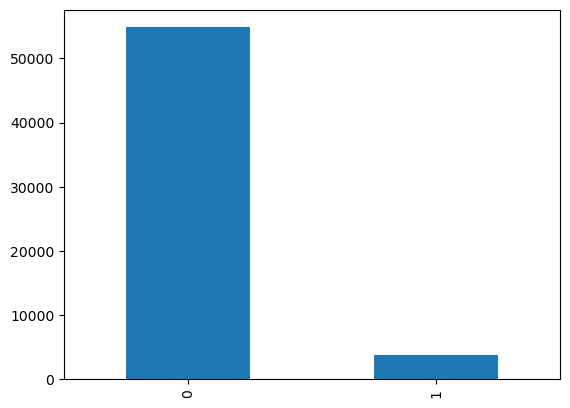

In [118]:
#checking the distribution of target value
df_train["is_claim"].value_counts().plot.bar()

*The distrution is found to be unequal*

In [119]:
df_train.shape

(58592, 44)

##### Data Cleaning

In [120]:
#there is no na values in the dataframe
df_train.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [121]:
#simultaneously checking for test dataframe also
#No NA values are there in test data
df_train.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

(array([15521., 18204.,  4116.,  8294.,  8810.,     0.,     0.,     0.,
          492.,  3155.]),
 array([  290.,  7604., 14918., 22232., 29546., 36860., 44174., 51488.,
        58802., 66116., 73430.]),
 <BarContainer object of 10 artists>)

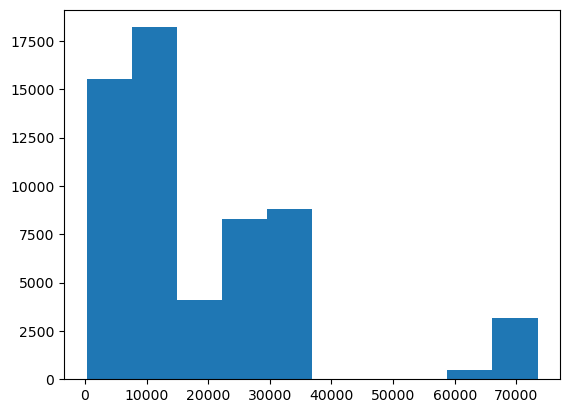

In [122]:
plt.hist(df_train['population_density'])

(array([15521., 18204.,  4116.,  8294.,  8810.,     0.,     0.,     0.,
          492.,  3155.]),
 array([-1.04965081, -0.63549509, -0.22133937,  0.19281635,  0.60697207,
         1.02112779,  1.43528351,  1.84943923,  2.26359495,  2.67775067,
         3.09190639]),
 <BarContainer object of 10 artists>)

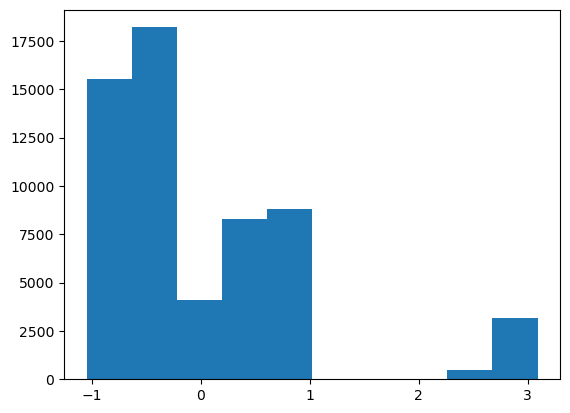

In [123]:
#Scaling the variable population density
df_train['population_density']= df_train['population_density'].to_numpy().reshape(-1, 1)
df_train['population_density']=StandardScaler().fit_transform(df_train[['population_density']])

plt.hist(df_train['population_density'])

##### Applying ML algorithms

In [124]:
#setting the independent variables and dependent variables
X=df_train.drop(["is_claim","policy_id"],axis=1)
X=X.apply(LabelEncoder().fit_transform)

Y=df_train['is_claim']

In [125]:
X.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,26642,5,37,0,3,0,0,0,0,5,2,6,1,0,0,0,1,0,1,0,0,1,0,2,1,0,1,0,2,0,0,0,0,0,0,0,1,0,0,0,1,0
1,32629,2,9,11,15,0,0,0,0,5,2,6,1,0,0,0,1,0,1,0,0,1,0,2,1,0,1,0,2,0,0,0,0,0,0,0,1,0,0,0,1,0
2,36984,2,10,15,2,0,0,0,0,5,2,6,1,0,0,0,1,0,1,0,0,1,0,2,1,0,1,0,2,0,0,0,0,0,0,0,1,0,0,0,1,0
3,38576,11,15,16,14,0,3,3,2,0,6,2,1,1,1,0,1,1,1,4,1,0,0,0,3,7,5,4,3,1,0,0,1,1,1,1,1,1,1,1,1,1
4,30237,11,36,17,17,1,0,4,2,8,5,0,1,0,0,0,0,1,1,2,0,0,0,0,6,3,2,1,1,0,0,0,0,0,1,1,1,0,1,1,1,1


In [126]:
#out of the 42 variables selecting the best 25 variables that will help to predict whther the customer will claim or not
#finding the most correlated variables 
kbest=SelectKBest(score_func=f_classif,k=25).fit(X,Y) 
X_best=kbest.transform(X)

##### Loss functions used

1) **Log Loss**: It quantifies the accuracy of the predicted probabilities by comparing them to the true probabilities, with lower values indicating better predictions and a value of 0 representing a perfect match.
2) **Hinge Loss**:Measures the loss incurred by the model for misclassifying instances, commonly used in binary classification with Support Vector Machines (SVM), aiming to maximize the margin between classes.


*Since we have a highly imbalanced target variable distribution with a binary classification, I believe the best loss function for the model will be hinge loss*

Other than lossed the code tries to measure these scores for a better understanding of the model created
- **Accuracy Score**: It measures the proportion of correctly classified instances out of the total number of instances, providing an overall assessment of the model's accuracy.
- **Precision Score**: It calculates the ratio of true positive predictions to the total number of positive predictions, indicating the model's ability to minimize false positives.
- **Recall Score**: Also known as sensitivity or true positive rate, it measures the ratio of true positive predictions to the total number of actual positive instances, reflecting the model's ability to identify positive cases.
- **F1 Score**: It combines precision and recall into a single metric, providing a balanced measure of the model's performance by considering both false positives and false negatives.

Decision Tree classifier model

In [127]:
#split ration 70:30
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,test_size=0.3,random_state=42)
#information gain condition for feature selection 
#Decision tree based prediction where the criterion is set to 'entropy'

dt=DecisionTreeClassifier(max_depth=6,random_state=42,criterion='entropy')
dt.fit(X_train,Y_train)
Y_Pred=dt.predict(X_test)

#Evaluate the model using different loss functions
acc=accuracy_score(Y_test,Y_Pred)
pre=precision_score(Y_test,Y_Pred)
rec=recall_score(Y_test,Y_Pred)
f1=f1_score(Y_test,Y_Pred)
log=log_loss(Y_test,Y_Pred)


#Print the loss values
print(f"Accuracy score: {acc}")
print(f"Precision score: {pre}")
print(f"Recall score: {rec}")
print(f"f1 score: {f1}")
print(f"log loss: {log}")


Accuracy score: 0.9336670838548186
Precision score: 0.14285714285714285
Recall score: 0.0008613264427217916
f1 score: 0.0017123287671232878
log loss: 2.390880637826294


In [128]:
#split ration 80:20
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=42)
#information gain condition for feature selection 
#Decision tree based prediction where the criterion is set to 'entropy'

dt=DecisionTreeClassifier(max_depth=6,random_state=42,criterion='entropy')
dt.fit(X_train,Y_train)
Y_Pred=dt.predict(X_test)

#Evaluate the model using different loss functions
acc=accuracy_score(Y_test,Y_Pred)
pre=precision_score(Y_test,Y_Pred)
rec=recall_score(Y_test,Y_Pred)
f1=f1_score(Y_test,Y_Pred)
log=log_loss(Y_test,Y_Pred)


#Print the loss values
print(f"Accuracy score: {acc}")
print(f"Precision score: {pre}")
print(f"Recall score: {rec}")
print(f"f1 score: {f1}")
print(f"log loss: {log}")


Accuracy score: 0.9353187132007851
Precision score: 0.0
Recall score: 0.0
f1 score: 0.0
log loss: 2.3313498821529826


In [129]:
#split ration 90:10
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.9,test_size=0.1,random_state=42)
#information gain condition for feature selection 
#Decision tree based prediction where the criterion is set to 'entropy'

dt=DecisionTreeClassifier(max_depth=6,random_state=42,criterion='entropy')
dt.fit(X_train,Y_train)
Y_Pred=dt.predict(X_test)

#Evaluate the model using different loss functions
acc=accuracy_score(Y_test,Y_Pred)
pre=precision_score(Y_test,Y_Pred)
rec=recall_score(Y_test,Y_Pred)
f1=f1_score(Y_test,Y_Pred)
log=log_loss(Y_test,Y_Pred)


#Print the loss values
print(f"Accuracy score: {acc}")
print(f"Precision score: {pre}")
print(f"Recall score: {rec}")
print(f"f1 score: {f1}")
print(f"log loss: {log}")

Accuracy score: 0.9349829351535837
Precision score: 0.0
Recall score: 0.0
f1 score: 0.0
log loss: 2.343452549701986


Random Forest Classifier model

In [130]:
#split ration 70:30
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,test_size=0.3,random_state=42)


rf=RandomForestClassifier(criterion='entropy')
rf.fit(X_train,Y_train)
Y_Pred=rf.predict(X_test)

#Evaluate the model using different loss functions
acc=accuracy_score(Y_test,Y_Pred)
pre=precision_score(Y_test,Y_Pred)
rec=recall_score(Y_test,Y_Pred)
f1=f1_score(Y_test,Y_Pred)
log=log_loss(Y_test,Y_Pred)


#Print the loss values
print(f"Accuracy score: {acc}")
print(f"Precision score: {pre}")
print(f"Recall score: {rec}")
print(f"f1 score: {f1}")
print(f"log loss: {log}")

Accuracy score: 0.9296279440209353
Precision score: 0.09574468085106383
Recall score: 0.007751937984496124
f1 score: 0.014342629482071713
log loss: 2.5364659939889584


In [131]:
#split ration 80:20
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=42)

rf=RandomForestClassifier(criterion='entropy')
rf.fit(X_train,Y_train)
Y_Pred=rf.predict(X_test)

#Evaluate the model using different loss functions
acc=accuracy_score(Y_test,Y_Pred)
pre=precision_score(Y_test,Y_Pred)
rec=recall_score(Y_test,Y_Pred)
f1=f1_score(Y_test,Y_Pred)
log=log_loss(Y_test,Y_Pred)


#Print the loss values
print(f"Accuracy score: {acc}")
print(f"Precision score: {pre}")
print(f"Recall score: {rec}")
print(f"f1 score: {f1}")
print(f"log loss: {log}")

Accuracy score: 0.9306254799897602
Precision score: 0.09859154929577464
Recall score: 0.009259259259259259
f1 score: 0.016928657799274487
log loss: 2.500511153285455


In [132]:
#split ration 90:10
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.9,test_size=0.1,random_state=42)

rf=RandomForestClassifier(criterion='entropy')
rf.fit(X_train,Y_train)
Y_Pred=rf.predict(X_test)

#Evaluate the model using different loss functions
acc=accuracy_score(Y_test,Y_Pred)
pre=precision_score(Y_test,Y_Pred)
rec=recall_score(Y_test,Y_Pred)
f1=f1_score(Y_test,Y_Pred)
log=log_loss(Y_test,Y_Pred)


#Print the loss values
print(f"Accuracy score: {acc}")
print(f"Precision score: {pre}")
print(f"Recall score: {rec}")
print(f"f1 score: {f1}")
print(f"log loss: {log}")

Accuracy score: 0.9295221843003413
Precision score: 0.09523809523809523
Recall score: 0.010554089709762533
f1 score: 0.019002375296912115
log loss: 2.5402779607005774


Support Vector Machine

In [133]:
#split ratio 70:30
from sklearn.svm import SVC
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,test_size=0.3,random_state=42)

model=SVC()
model.fit(X_train,Y_train)
Y_Pred=model.predict(X_test)

#Evaluate the model using different loss functions
acc=accuracy_score(Y_test,Y_Pred)
pre=precision_score(Y_test,Y_Pred)
rec=recall_score(Y_test,Y_Pred)
f1=f1_score(Y_test,Y_Pred)
log=log_loss(Y_test,Y_Pred)
hin=hinge_loss(Y_test,Y_Pred)


#Print the loss values
print(f"Accuracy score: {acc}")
print(f"Precision score: {pre}")
print(f"Recall score: {rec}")
print(f"f1 score: {f1}")
print(f"log loss: {log}")
print(f"hinge loss: {hin}")


Accuracy score: 0.9339515303219934
Precision score: 0.0
Recall score: 0.0
f1 score: 0.0
log loss: 2.3806281479556843
hinge loss: 1.0


In [134]:
#split ratio 80:20
from sklearn.svm import SVC
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=42)

model=SVC()
model.fit(X_train,Y_train)
Y_Pred=model.predict(X_test)

#Evaluate the model using different loss functions
acc=accuracy_score(Y_test,Y_Pred)
pre=precision_score(Y_test,Y_Pred)
rec=recall_score(Y_test,Y_Pred)
f1=f1_score(Y_test,Y_Pred)
log=log_loss(Y_test,Y_Pred)
hin=hinge_loss(Y_test,Y_Pred)


#Print the loss values
print(f"Accuracy score: {acc}")
print(f"Precision score: {pre}")
print(f"Recall score: {rec}")
print(f"f1 score: {f1}")
print(f"log loss: {log}")
print(f"hinge loss: {hin}")

Accuracy score: 0.9354893762266405
Precision score: 0.0
Recall score: 0.0
f1 score: 0.0
log loss: 2.3251985632027115
hinge loss: 1.0


In [135]:
#split ratio 90:10
from sklearn.svm import SVC
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.9,test_size=0.1,random_state=42)

model=SVC()
model.fit(X_train,Y_train)
Y_Pred=model.predict(X_test)

#Evaluate the model using different loss functions
acc=accuracy_score(Y_test,Y_Pred)
pre=precision_score(Y_test,Y_Pred)
rec=recall_score(Y_test,Y_Pred)
f1=f1_score(Y_test,Y_Pred)
log=log_loss(Y_test,Y_Pred)
hin=hinge_loss(Y_test,Y_Pred)


#Print the loss values
print(f"Accuracy score: {acc}")
print(f"Precision score: {pre}")
print(f"Recall score: {rec}")
print(f"f1 score: {f1}")
print(f"log loss: {log}")
print(f"hinge loss: {hin}")

Accuracy score: 0.9353242320819113
Precision score: 0.0
Recall score: 0.0
f1 score: 0.0
log loss: 2.331150961514574
hinge loss: 1.0


*None of the models did not get a good score in terms of precision. Though there is accuracy precison is very less*

*However, with the calculations done, i believe it is decision tree classifier with train test split of 70:30, that gives the best result*

Best model 

In [136]:
#split ration 70:30
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,test_size=0.3,random_state=42)
#information gain condition for feature selection 
#Decision tree based prediction where the criterion is set to 'entropy'

dt=DecisionTreeClassifier(max_depth=6,random_state=42,criterion='entropy')
dt.fit(X_train,Y_train)
Y_Pred=dt.predict(X_test)

#Evaluate the model using different loss functions
acc=accuracy_score(Y_test,Y_Pred)
pre=precision_score(Y_test,Y_Pred)
rec=recall_score(Y_test,Y_Pred)
f1=f1_score(Y_test,Y_Pred)
log=log_loss(Y_test,Y_Pred)


#Print the loss values
print(f"Accuracy score: {acc}")
print(f"Precision score: {pre}")
print(f"Recall score: {rec}")
print(f"f1 score: {f1}")
print(f"log loss: {log}")

Accuracy score: 0.9336670838548186
Precision score: 0.14285714285714285
Recall score: 0.0008613264427217916
f1 score: 0.0017123287671232878
log loss: 2.390880637826294


*Applying the same to predict test*

In [142]:
#setting the independent variables and dependent variables
X1=df_test.drop(["policy_id"],axis=1)
X1=X1.apply(LabelEncoder().fit_transform)

In [146]:
Y_Pred1=pd.DataFrame(dt.predict(X1))
Y_Pred1


,0
0,0
1,0
2,0
3,0
4,0
...,...
39058,0
39059,0
39060,0
39061,0


In [148]:
#Creating the submission file
data_pred= pd.DataFrame()
data_pred['policy_id']=df_test['policy_id']
data_pred['is_claim']=Y_Pred1
data_pred.to_csv('prediction.csv', index=None)

In [149]:
data_pred

,policy_id,is_claim
0,ID58593,0
1,ID58594,0
2,ID58595,0
3,ID58596,0
4,ID58597,0
...,...,...
39058,ID97651,0
39059,ID97652,0
39060,ID97653,0
39061,ID97654,0
